In [1]:
import pandas as pd
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
years_election =[1994, 1995, 1997, 1999, 2002, 2004, 2007, 2009, 2012, 2014, 2017,
       2019, 2022,2024]

In [3]:
df = pd.read_excel("age-depart-retraite.xlsx",skiprows=3)
df = df.iloc[0:18,[0,3]]
df= df.rename(columns={"Ensemble":"age-depart-retraite"})
df.loc[len(df.index)] = [2022, 63]  
df.loc[len(df.index)] = [2002, 60.63]  
df.loc[len(df.index)] = [1999, 60.]
df.loc[len(df.index)] = [1997, 60.5]
df.loc[len(df.index)] = [1995, 60.5]
df.loc[len(df.index)] = [1994, 60.4]
df = df.sort_values(by='Année', ascending=True)
df

,Année,age-depart-retraite
23,1994.0,60.40
22,1995.0,60.50
21,1997.0,60.50
20,1999.0,60.00
19,2002.0,60.63
17,2004,60.59
16,2005,60.55
15,2006,60.50
14,2007,60.47
13,2008,60.39


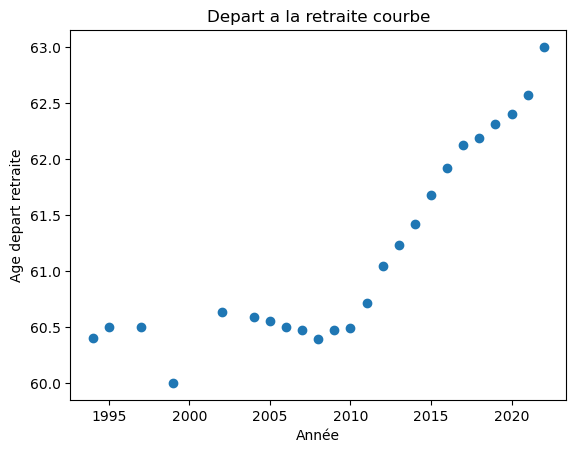

In [4]:
plt.scatter(df["Année"], df["age-depart-retraite"])
plt.xlabel("Année")
plt.ylabel("Age depart retraite")
plt.title("Depart a la retraite courbe")
plt.show()

In [5]:
X = df.values[:,:-1]

y = df.values[:,-1]
poly_deg = PolynomialFeatures(degree=5)
X_poly = poly_deg.fit_transform(X)
#X_poly

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = .3, random_state = 2)

In [7]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)
reg3.score(X_test, y_test)

0.9264778118718957

In [8]:
y_pred = reg3.predict(X_poly)
y_pred

array([60.6946021 , 60.61201419, 60.47983829, 60.3929424 , 60.35087734,
       60.38395286, 60.41941225, 60.46774771, 60.52915617, 60.60383505,
       60.69198234, 60.79379654, 60.90947669, 61.03922235, 61.18323365,
       61.34171121, 61.51485621, 61.70287037, 61.90595594, 62.12431568,
       62.35815294, 62.60767156, 62.87307594, 63.15457102])

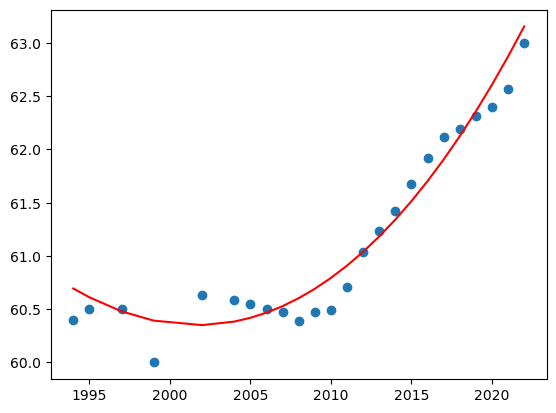

In [9]:
plt.scatter(df["Année"], df["age-depart-retraite"])
plt.plot(df["Année"], y_pred,color="r")

In [10]:
b = poly_deg.fit_transform([[2024]])
pred = reg3.predict(b)
pred

array([63.76665571])

In [11]:
df.loc[len(df.index)] = [2024, pred[0]]
df = df.sort_values(by='Année', ascending=True)
df

,Année,age-depart-retraite
23,1994.0,60.400000
22,1995.0,60.500000
21,1997.0,60.500000
20,1999.0,60.000000
19,2002.0,60.630000
17,2004,60.590000
16,2005,60.550000
15,2006,60.500000
14,2007,60.470000
13,2008,60.390000


In [12]:
departement_code= ['16','17','19','23','24','33','40','47','64','79','86','87']
df_passing_dep = []
for dep in departement_code :
    df_dep = df.copy()
    df_dep["Code du département"] = dep
    df_passing_dep.append(df_dep)
len(df_passing_dep)

12

In [13]:
df_passing_dep[7]

,Année,age-depart-retraite,Code du département
23,1994.0,60.400000,47
22,1995.0,60.500000,47
21,1997.0,60.500000,47
20,1999.0,60.000000,47
19,2002.0,60.630000,47
17,2004,60.590000,47
16,2005,60.550000,47
15,2006,60.500000,47
14,2007,60.470000,47
13,2008,60.390000,47


In [14]:
df_concat =  pd.concat(df_passing_dep)
df_concat

,Année,age-depart-retraite,Code du département
23,1994.0,60.400000,16
22,1995.0,60.500000,16
21,1997.0,60.500000,16
20,1999.0,60.000000,16
19,2002.0,60.630000,16
...,...,...,...
2,2019,62.310000,87
1,2020,62.400000,87
0,2021,62.570000,87
18,2022,63.000000,87


In [15]:
df_concat.to_csv("age-depart-retraite.csv")